<a href="https://colab.research.google.com/github/GuilhermeBorba2/Projetos-DataScience/blob/main/An%C3%A1lise_ST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np  
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from datetime import datetime as dt
import pytz

**Análise da Serie Temporal:** Produção de veiculos automotores no brasil 

In [3]:
path = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.1373/dados?formato=csv'
dados = pd.read_csv(path, sep=';')
dados

,data,valor
0,01/01/1993,66168
1,01/02/1993,73042
2,01/03/1993,98691
3,01/04/1993,88839
4,01/05/1993,101055
...,...,...
357,01/10/2022,206044
358,01/11/2022,215796
359,01/12/2022,191567
360,01/01/2023,152666


In [4]:
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    362 non-null    object
 1   valor   362 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [5]:
dados.shape

(362, 2)

In [7]:
#load de arquivos
dateparse = lambda dates: pd.datetime.strptime(dates, "%d/%m/%Y")
path = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.1373/dados?formato=csv'
dados = pd.read_table(path, sep=';', parse_dates=['data'], index_col='data', date_parser=dateparse)

<ipython-input-7-08b7400af3c5>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, "%d/%m/%Y")


In [8]:
dados.head()

,valor
data,
1993-01-01,66168
1993-02-01,73042
1993-03-01,98691
1993-04-01,88839
1993-05-01,101055


In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 1993-01-01 to 2023-02-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   valor   362 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


<Axes: xlabel='data'>

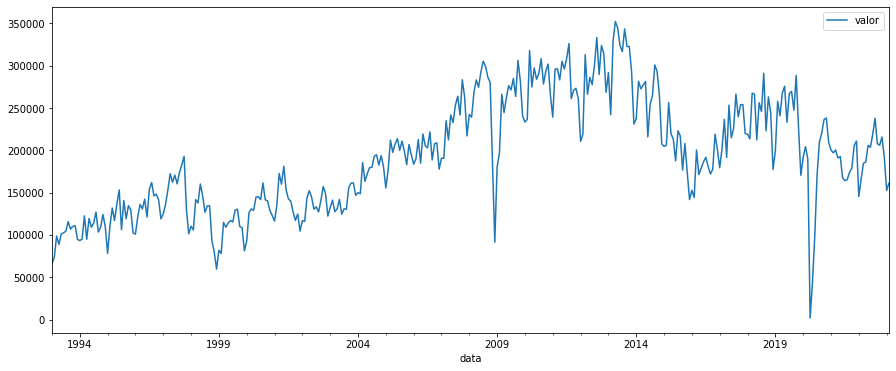

In [13]:
dados.plot(figsize=(15,6))


Analise de estacionariedade(ADFuller)


*   Bimestral
*   Trimestral


In [17]:
#Bimestral
bimestral = dados.resample('2M').mean()
bimestral.head()

,valor
data,
1993-01-31,66168.0
1993-03-31,85866.5
1993-05-31,94947.0
1993-07-31,103502.5
1993-09-30,111395.0


In [19]:

trimestral = dados.resample('Q').mean()
trimestral.head()

,valor
data,
1993-03-31,79300.333333
1993-06-30,97468.666667
1993-09-30,109094.333333
1993-12-31,105236.666667
1994-03-31,103672.333333


#Periodo: Bimestral

In [25]:
#janelas moveis(2meses)Mensal
#Periodo: mensal
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=2)
rolling_mean = dados.rolling(window=indexer, min_periods=2).mean()
rolling_mean = rolling_mean.shift(2) 
#deslocamento da janela = 2 meses
rolling_mean

,valor
data,
1993-01-01,NaN
1993-02-01,NaN
1993-03-01,69605.0
1993-04-01,85866.5
1993-05-01,93765.0
...,...
2022-10-01,222861.5
2022-11-01,206903.0
2022-12-01,210920.0


# Período: Trimestral

In [27]:
#Fazer a janela movel de 3 meses
#periodo: Mensal
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=3)
rolling_mean = dados.rolling(window=indexer, min_periods=3).mean()
rolling_mean = rolling_mean.shift(3) 
#deslocamento da janela = 3 meses
rolling_mean

,valor
data,
1993-01-01,NaN
1993-02-01,NaN
1993-03-01,NaN
1993-04-01,79300.333333
1993-05-01,86857.333333
...,...
2022-10-01,221557.666667
2022-11-01,217255.666667
2022-12-01,209867.333333


# Análise de Sazonalidade

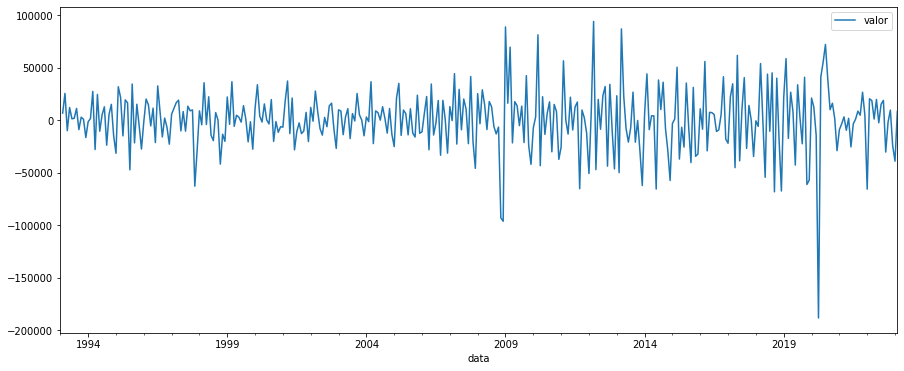

In [31]:
 dados.diff().plot(figsize=(15,6));

Como a  serie temporal é muito grande, fica complicado de fazer a analise sazonalidade, dessa forma vamos fazer um filtro nos nossos dados.

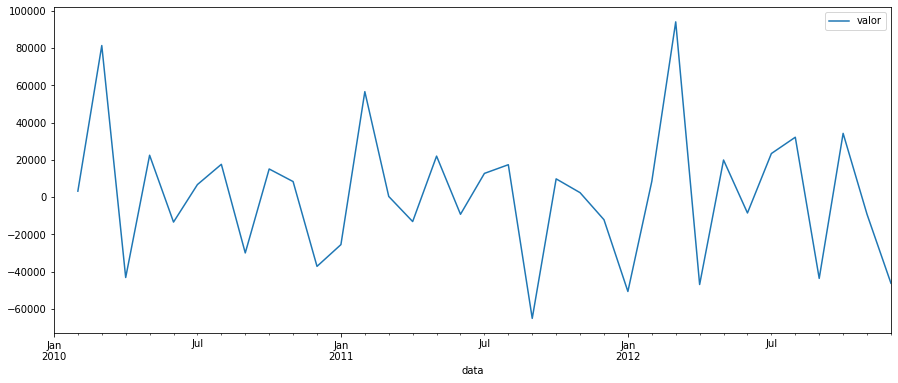

In [30]:
filtro = ((dados.index.year >=2010) & (dados.index.year <=2012))
dados[filtro].diff().plot(figsize=(15,6));

## Análise de Tendêcia (12 meses)

In [32]:
#função  para plotar uma serie e sua media movel 12 meses
def plot_mediamovel(timeseries):
  rolmean = timeseries.rolling(12).mean()

  plt.figure(figsize=(15,6))
  orig = plt.plot(timeseries, color='blue', label='Original')
  mean = plt.plot(rolmean, color='red', label='Média movel 12 meses')
  plt.legend(loc='best')
  plt.title('Valor original e média movel dos 12 meses')
  plt.show(block=False)


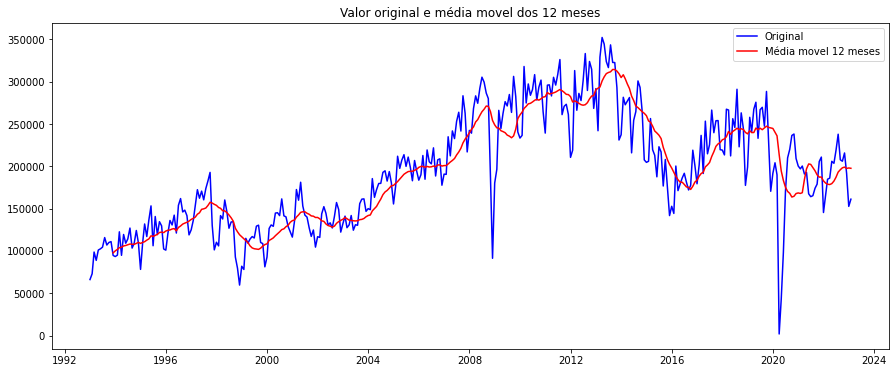

In [33]:
#plotar o grafico com a media movel
plot_mediamovel(dados)

<Axes: xlabel='data'>

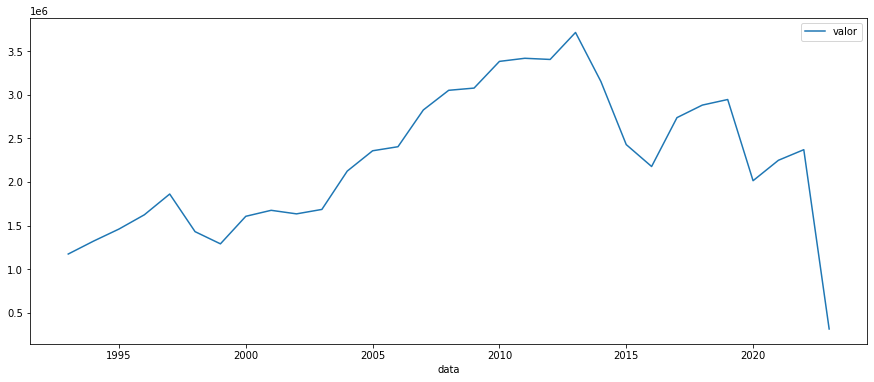

In [34]:
#media movel usando o group
dados.groupby(dados.index.year).sum().plot(figsize=(15,6))